In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colormap import Color
import datetime
import time
%matplotlib inline

#logging
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.info('Test Debug')

In [2]:
# read cumtd files and make a panda dataframe from the files
# calendar_dates.txt
calendar_dates = pd.read_csv('cumtd/calendar_dates.txt')
# routes
routes = pd.read_csv('cumtd/routes.txt')
# shapes
shapes = pd.read_csv('cumtd/shapes.txt')
# stop_times
stop_times = pd.read_csv('cumtd/stop_times.txt')
# stops
stops = pd.read_csv('cumtd/stops.txt')
# trips
trips = pd.read_csv('cumtd/trips.txt')


In [3]:
calendar_dates

,service_id,date,exception_type
0,I4UISU,20170115,1
1,I4UISU,20170122,1
2,I4UISU,20170129,1
3,I4UISU,20170205,1
4,I4UISU,20170212,1
5,I4UISU,20170219,1
6,I4UISU,20170226,1
7,I4UISU,20170305,1
8,I4UISU,20170312,1
9,I4UISU,20170326,1


In [4]:
trips

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,TEAL,T4 UIMF,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 26
1,TEAL,T4 UIMF,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
2,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
3,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
4,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
5,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/6__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12
6,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541488843]/110__T4_UIMF,EAST - PAR,0,T4 UIMF,TEAL 34
7,TEAL,T4 UIMF,[@14.0.51708725@][4][1275506079140]/6__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,TEAL 23
8,TEAL,T4 UIMF,[@7.0.41893871@][3][1243541396687]/79__T4_UIMF,EAST - ORCHARD DOWNS,0,T4 UIMF,12E TEAL 13
9,TEAL,T4 UIMF,[@7.0.41893871@][4][1243540851671]/11__T4_UIMF,WEST - ILLINOIS TERMINAL,1,T4 UIMF,12W TEAL 12


In [5]:
shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,[@2.0.86175868@]34,40.114158,-88.173105,0,0.000000
1,[@2.0.86175868@]34,40.114158,-88.173106,1,0.134184
2,[@2.0.86175868@]34,40.114171,-88.173107,2,1.560577
3,[@2.0.86175868@]34,40.114186,-88.173108,3,3.228456
4,[@2.0.86175868@]34,40.114200,-88.173109,4,4.787531
5,[@2.0.86175868@]34,40.114215,-88.173112,5,6.471524
6,[@2.0.86175868@]34,40.114220,-88.173112,6,7.024778
7,[@2.0.86175868@]34,40.114225,-88.173113,7,7.594072
8,[@2.0.86175868@]34,40.114231,-88.173114,8,8.271667
9,[@2.0.86175868@]34,40.114236,-88.173115,9,8.832998


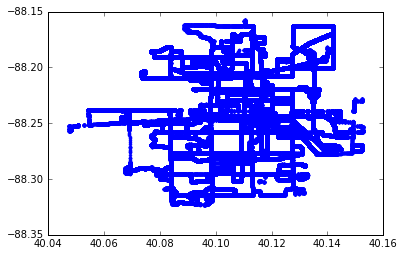

In [6]:
# draw all the shapes / route of the cumtd
plt.plot(shapes['shape_pt_lat'],shapes['shape_pt_lon'],'.')

In [7]:
# expore trips to group the route
trips
trips.shape_id.unique()
# ok we find a relation between trips and shapes
# explore route
#routes.keys()
#routes.xroute_id.unique()
#trips.route_id.unique()
#trips.keys()
#routes.iterrows()
shapes.keys()
routes.route_color.unique() 
routes[routes['route_color']=='eb008b']
#stop_times

,xroute_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
1,RUBY SATURDAY,CUMTD,110,Ruby Saturday,NaN,3,NaN,eb008b,000000
26,RUBY SUNDAY,CUMTD,110,Ruby Sunday,NaN,3,NaN,eb008b,000000
41,RUBY EVENING SATURDAY,CUMTD,110,Ruby Evening Saturday,NaN,3,NaN,eb008b,000000
44,RUBY,CUMTD,11,Ruby,NaN,3,NaN,eb008b,000000
81,RUBY EVENING,CUMTD,110,Ruby Evening,NaN,3,NaN,eb008b,000000


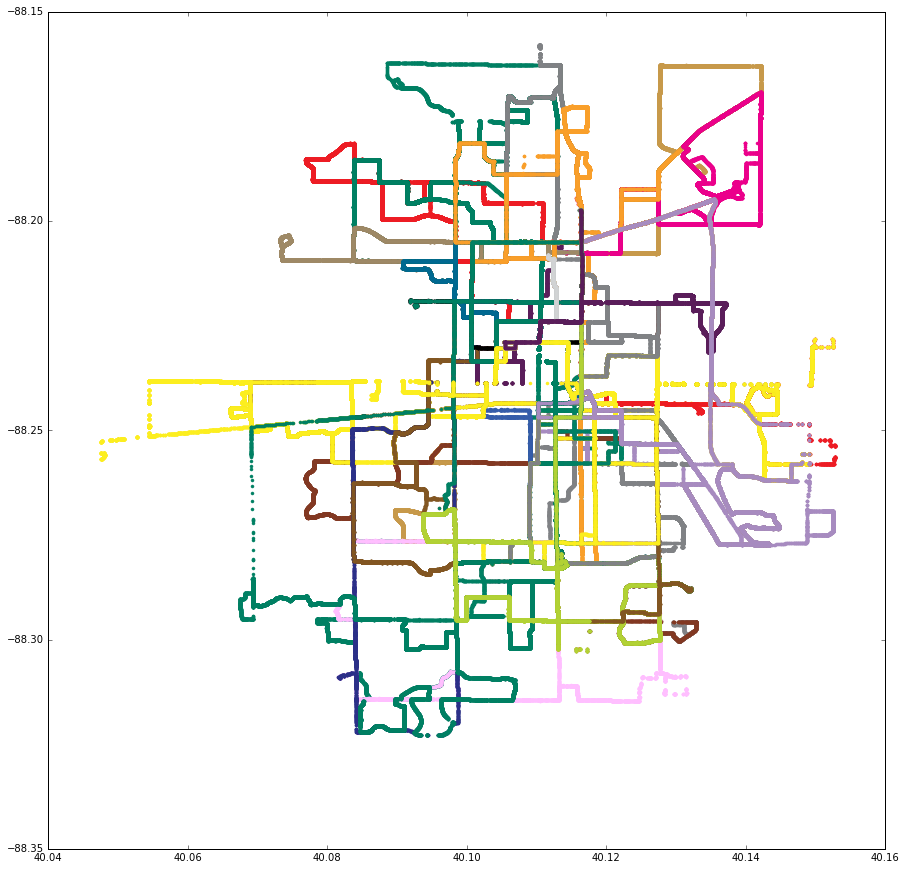

In [8]:
"""
sample_fig = plt.figure(figsize=(15,15));
ax = plt.subplot();
for route_idx,route in routes.iterrows():
    obs_color = route['route_color']
#    log.debug(obs_color)
    obs_rgb=Color('#'+obs_color)
#    print(obs_rgb)
    obs_trips = trips[trips['route_id']==route['xroute_id']]    
#    for trip_idx,obs_trip in obs_trips.iterrows():
    for obs_shape_id in obs_trips.shape_id.unique():                    
        obs_shape = shapes[shapes['shape_id']==obs_shape_id]
        ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)
"""

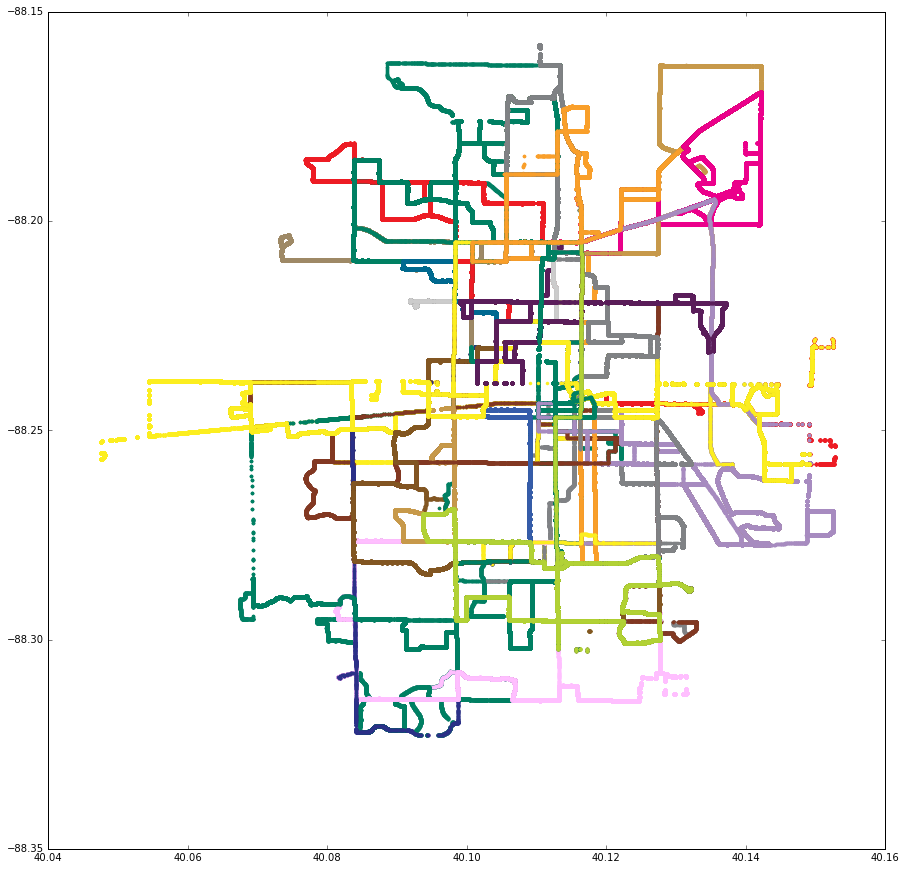

In [9]:
def draw_plot_lambda(routes,route_id,shape_id,ax):
    obs_color = routes[routes['xroute_id']==route_id]['route_color'].values[0]
    obs_rgb=Color('#'+obs_color)
    obs_shape = shapes[shapes['shape_id']==shape_id]
    ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)
    
def draw_plot(routes,trips):
    sample_fig = plt.figure(figsize=(15,15));
    ax = plt.subplot();
    trips.apply(lambda row: draw_plot_lambda(routes,row['route_id'],row['shape_id'],ax),axis=1)

    """
    for trip_idx,obs_trips in trips.iterrows():
        obs_color = routes[routes['xroute_id']==obs_trips['route_id']]['route_color'].values[0]
        obs_rgb=Color('#'+obs_color)
        obs_shape = shapes[shapes['shape_id']==obs_trips.shape_id]
        ax.plot(obs_shape['shape_pt_lat'],obs_shape['shape_pt_lon'],'.',color=obs_rgb.hex)
    """     
#draw_plot(routes,trips)



In [10]:
# Most frequent route

# filter our observation stoptime which has departure_time > 08:00 and arrival_time <17:00
#datetime.datetime.strptime(, "H:%M:%S")
x = datetime.datetime.strptime('00:00:00,000'.split(',')[0],'%H:%M:%S')
for stopidx,stopval in stop_times.iterrows():
    #print(arr_val[0:2])
    arr_val = stopval['arrival_time']
    dep_val = stopval['departure_time']
    if(int(arr_val[0:2])>=24):
        arr_val='{0:02d}'.format(int(arr_val[0:2])-24)+arr_val[2:len(arr_val)]        
    if(int(dep_val[0:2])>=24):
        dep_val='{0:02d}'.format(int(dep_val[0:2])-24)+dep_val[2:len(dep_val)]        
    x = time.strptime(arr_val, "%H:%M:%S")
    stopval['arrival_time_ms'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    x = time.strptime(dep_val, "%H:%M:%S")
    stopval['departure_time_ms'] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

#stop_times['arrival_time_ms'] = stop_times['arrival_time']

In [11]:
# convert arrival and departure time into millisecond
def convertToSecond(col):
    arr_val = col
    if(int(arr_val[0:2])>=24):
        arr_val='{0:02d}'.format(int(arr_val[0:2])-24)+arr_val[2:len(arr_val)]
    x = time.strptime(arr_val, "%H:%M:%S")
    second = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    return second

stop_times['arrival_time_ms'] = stop_times['arrival_time']\
    .apply(lambda col: convertToSecond(col))    
stop_times['departure_time_ms'] = stop_times['departure_time']\
    .apply(lambda col: convertToSecond(col))


In [12]:
# filter from stop_time arrival time that has 08:00 until 17:00 value
low_time = convertToSecond('08:00:00')
high_time = convertToSecond('17:00:00')
stop_mask = (stop_times['arrival_time_ms']>=low_time) & (stop_times['arrival_time_ms']<=high_time)
stop_obs = stop_times[stop_mask]


In [13]:
# filter trip_id based on the stop_obs and collect the frequency based on route
def filterTripsById(trips,trip_id):
    return(trips[trips['trip_id'].isin(trip_id)])

trips_obs = filterTripsById(trips,stop_obs['trip_id'].unique())
#trips_obs = stop_obs['trip_id'].unique().map(lambda x:filterTripsById(trips,x))

In [14]:
# get the total trips by route_id
# and order the total
top_10_route = trips_obs.groupby('route_id')['route_id'].count().sort_values(ascending=False)[0:10]
top_10_route

route_id
SILVER                     276
TEAL                       184
ILLINI                     175
TEAL SATURDAY              168
YELLOWHOPPER               114
ILLINI LIMITED SATURDAY    111
TEAL SUNDAY                102
YELLOW SATURDAY             98
GREY SATURDAY               91
GREEN SATURDAY              89
Name: route_id, dtype: int64

In [15]:
type(top_10_route)


pandas.core.series.Series

In [16]:
# filter trip by route
def filterTripsByRoute(trips,route_id):
    return(trips[trips['route_id'].isin(route_id)])

trips_top_10 = filterTripsByRoute(trips_obs,top_10_route.index)

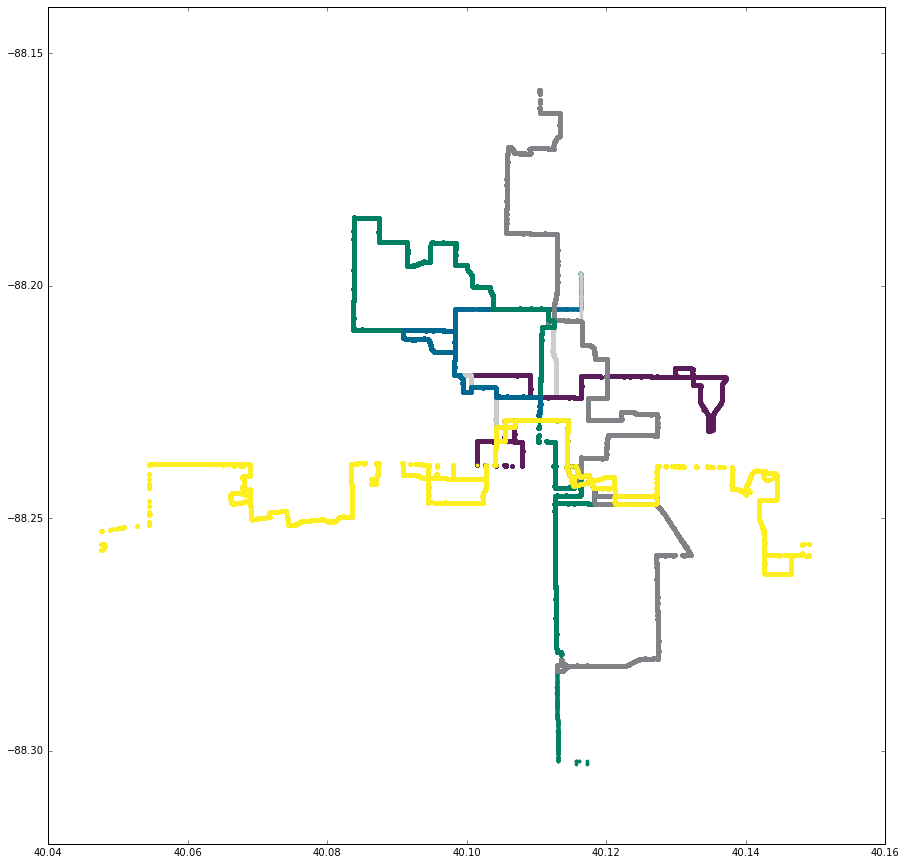

In [17]:
draw_plot(routes,trips_top_10)

<Container object of 10 artists>

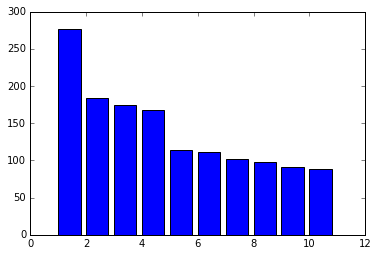

In [18]:
plt.bar(list(range(1,11)),top_10_route.values)

(array([ 4.,  2.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([  89. ,  107.7,  126.4,  145.1,  163.8,  182.5,  201.2,  219.9,
         238.6,  257.3,  276. ]),
 <a list of 10 Patch objects>)

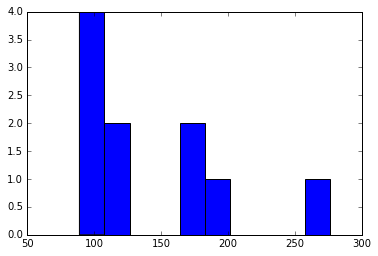

In [19]:
plt.hist(top_10_route)

In [20]:
list(range(1,11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
## Stops observation
# get the top 10 stop density as our observation data
topConstant = 5
stop_all_density = stop_times.groupby('stop_id')['stop_id'].count()
stop_top_10_density = stop_times.groupby('stop_id')['stop_id'].count().sort_values(ascending=False)[0:topConstant]
stop_top_10_obs = stop_times[stop_times['stop_id'].isin(list(stop_top_10_density.index))]

In [22]:
stop_top_10_obs

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,arrival_time_ms,departure_time_ms
1,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,2,WEST - ILLINOIS TERMINAL,0,0,27300.0,27300.0
2,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,0,WEST - ILLINOIS TERMINAL,0,0,27300.0,27300.0
9,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:42:00,07:42:00,GRNMAT:1,7,NaN,0,0,27720.0,27720.0
10,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:43:00,07:43:00,IU:2,8,NaN,0,0,27780.0,27780.0
26,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,08:02:00,08:02:00,IU:1,8,NaN,0,0,28920.0,28920.0
27,[@7.0.41893871@][3][1243541396687]/72__T4_UIMF,08:02:40,08:02:40,GRNMAT:3,9,NaN,0,0,28960.0,28960.0
52,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,08:21:00,08:21:00,PAR:2,7,NaN,0,0,30060.0,30060.0
59,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,08:27:10,08:27:10,GRNMAT:1,14,NaN,0,0,30430.0,30430.0
60,[@7.0.41893871@][4][1243540851671]/4__T4_UIMF,08:28:00,08:28:00,IU:2,15,NaN,0,0,30480.0,30480.0
76,[@7.0.41893871@][3][1243541396687]/74__T4_UIMF,08:42:00,08:42:00,IU:1,8,NaN,0,0,31320.0,31320.0


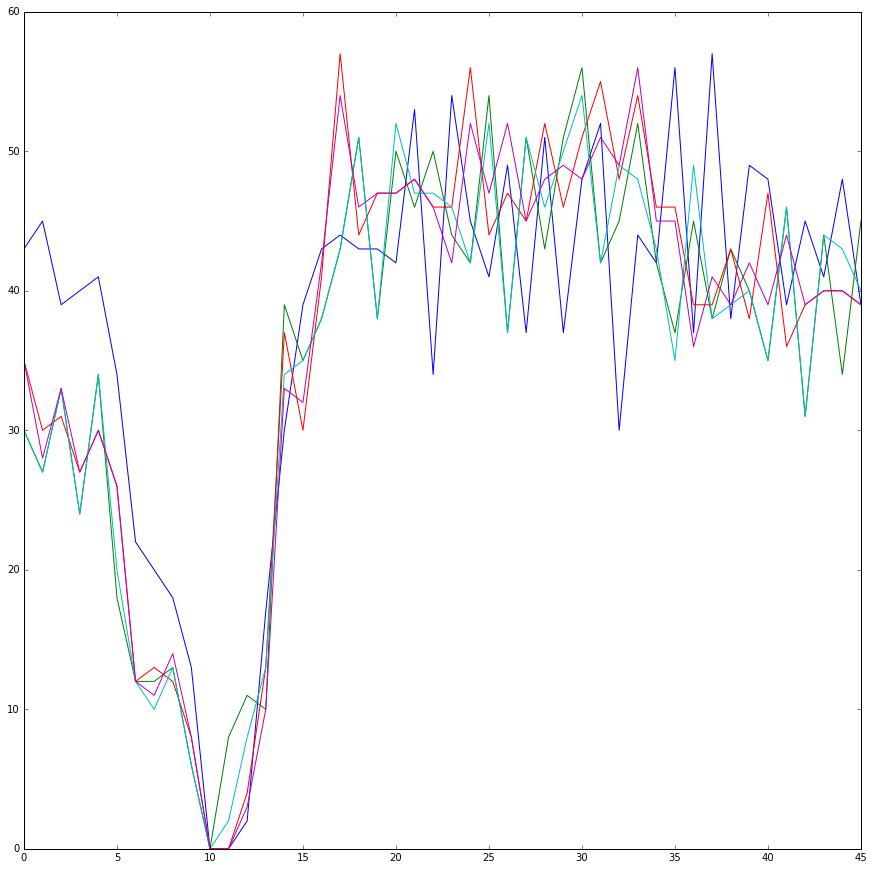

In [23]:
# bin the arrival time for every 30 minutes bin
binConstant = convertToSecond('00:30:00')
low_time = stop_top_10_obs.arrival_time_ms.min()
high_time = stop_top_10_obs.arrival_time_ms.max()
binNum = (high_time-low_time)/binConstant
# go through all the stop id and make bining for every 30 minutes
stop_top_10_name = stop_top_10_obs.stop_id.unique()

# to bin we need to make range between low_time, high_time and binConstant step
bin_steps = np.linspace(low_time,high_time,binNum)
stop_bin_arr = []
for i in range(len(bin_steps)-1):
#    print(i)
    bin_obs = stop_top_10_obs[(stop_top_10_obs['arrival_time_ms']>=bin_steps[i])&(stop_top_10_obs['arrival_time_ms']<bin_steps[i+1])]    
    stop_bin_arr.append(bin_obs.groupby('stop_id')['stop_id'].count())

# convert this back into stop id keys data
stop_time_series = {}
for name in stop_top_10_name:
    stop_time_series[name] = []
    
for stop_bin in stop_bin_arr:
    for name in stop_top_10_name:
        if name in stop_bin.index:
            stop_time_series[name].append(stop_bin[name])
        else:
            stop_time_series[name].append(0)
    
# plot the stop_bin_arr using line plot in time series window
sample_fig = plt.figure(figsize=(15,15));
ax = plt.subplot();
for stop in stop_time_series.keys():    
    ax.plot(list(range(0,len(stop_time_series[stop]))),stop_time_series[stop],'-')

In [24]:
stop_bin_arr[0].index

Index(['GRNMAT:1', 'GRNMAT:3', 'IU:1', 'IU:2', 'PAR:2'], dtype='object', name='stop_id')

In [25]:
stop_time_series['IU:1']
len(stop_bin_arr)

46

In [26]:
binConstant

1800.0

In [27]:
stop_all_density

stop_id
150DALE:1         18
150DALE:3         20
150DOD:5          40
150UNI:4          28
150UNI:8          18
1STARY:4         338
1STARY:5         344
1STDAN:1         338
1STDAN:6         344
1STE14:8          71
1STGRG:1         319
1STGRG:2         670
1STGRG:4         338
1STGTY:2         109
1STGTY:4         110
1STGTY:7         110
1STHZLWD:2       109
1STHZLWD:4       153
1STIHOTEL:1      148
1STIHOTEL:2      109
1STLAKEPKN:2     110
1STLAKEPKN:4     174
1STLAKEPKS:2     110
1STLAKEPKS:4     174
1STSMR:1          31
1STSMR:3         133
1STSMR:4         115
1STSMR:5          29
1STSMR:8         109
1STSPFLD:1       259
                ... 
WRDKER:3          22
WRTBCH:1         139
WRTBCH:2         139
WRTBSLN:2        139
WRTCHAL:4       1247
WRTCHCH:2        139
WRTCHCH:4        139
WRTCLMBA:4       139
WRTDBLN:2        139
WRTHIL:4         139
WRTHIL:5         139
WRTHLY:4         771
WRTSPFLD:2       772
WRTSPFLD:4       762
WRTSTOTN:2       706
WRTWASH:4        139
WSFLD

In [36]:
stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,KBYWSFLD:3,MTD4346,Kirby & Westfield (South Side),NaN,40.098248,-88.290173,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
1,PHILOMI:4,MTD1026,Philo & Michigan (NW Corner),NaN,40.101792,-88.190865,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
2,DNCNCLKRD:2,MTD3333,Duncan & Clark (SE Corner),NaN,40.117390,-88.295470,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
3,TRLSPHILO:1,MTD6424,Trails & Philo (NE Corner),NaN,40.077915,-88.190315,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
4,RMNERKA:4,MTD4040,Romine & Eureka (NW Corner),NaN,40.125585,-88.227525,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
5,IRNWDSTLY:4,MTD0429,Ironwood & Staley (NW Corner),NaN,40.089826,-88.314226,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
6,5THCLMBA:4,MTD2036,Fifth & Columbia (NW Corner),NaN,40.121308,-88.232153,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
7,KRBYGLNSHR:1,MTD9073,Kirby & Glenshire (NE Corner),NaN,40.098683,-88.311765,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
8,WDSRMTRY:3,MTD2774,Windsor & Monterey (SW Corner),NaN,40.083500,-88.253890,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN
9,GC:2,MTD2437,Ginger Creek (North Side),NaN,40.113025,-88.292158,1,http://www.cumtd.com/maps-and-schedules/bus-st...,0,NaN


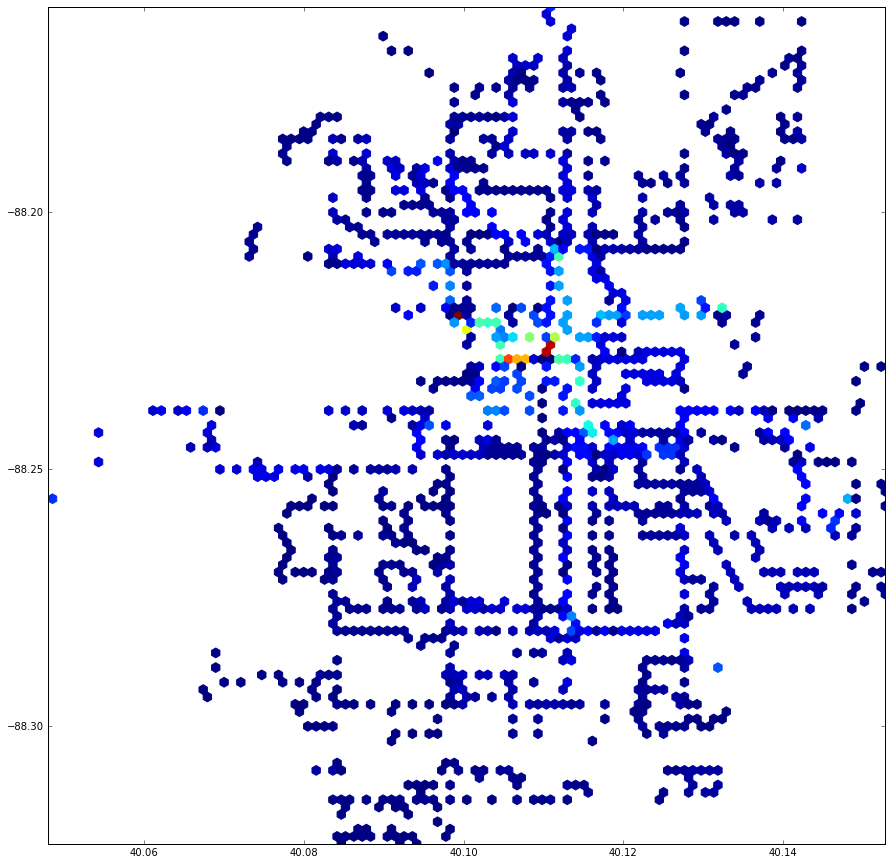

In [38]:
plt.figure(figsize=(15,15));
# copy the observation stops and match it with frequency
obs_stops = stops.copy()
stop_times['arrival_time_ms'] = stop_times['arrival_time']\
    .apply(lambda col: convertToSecond(col))
obs_stops['frequency'] = obs_stops['stop_id'].apply(lambda col: stop_all_density[col])
plt.hexbin(obs_stops['stop_lat'],obs_stops['stop_lon'],obs_stops['frequency'])

In [39]:
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,arrival_time_ms,departure_time_ms
0,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,07:25:00,07:25:00,DEPOT:1,0,WEST - ILLINOIS TERMINAL,0,0,26700.0,26700.0
1,[@14.0.51708725@][4][1277756770140]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,2,WEST - ILLINOIS TERMINAL,0,0,27300.0,27300.0
2,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:35:00,07:35:00,PAR:2,0,WEST - ILLINOIS TERMINAL,0,0,27300.0,27300.0
3,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:36:35,07:36:35,PAMD:2,1,NaN,0,0,27395.0,27395.0
4,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:37:48,07:37:48,PSL:2,2,NaN,0,0,27468.0,27468.0
5,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:38:26,07:38:26,GRGDNR:2,3,NaN,0,0,27506.0,27506.0
6,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:39:04,07:39:04,GWNGRG:1,4,NaN,0,0,27544.0,27544.0
7,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:39:42,07:39:42,GWNNV:2,5,NaN,0,0,27582.0,27582.0
8,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:41:02,07:41:02,KRANNERT:2,6,NaN,0,0,27662.0,27662.0
9,[@14.0.51708725@][4][1275505811421]/0__T4_UIMF,07:42:00,07:42:00,GRNMAT:1,7,NaN,0,0,27720.0,27720.0


In [116]:
# calculate travel time and add travel time into trips data frame
def getTravelTime(stop_times,trip_id):
    # filter stop_times by trip_id
    obs_stops = stop_times[stop_times['trip_id']==trip_id]
    # get minimum seq and maximum sequence of trips
    min_seq = obs_stops['stop_sequence'].min()
    max_seq = obs_stops['stop_sequence'].max()
    max_time = obs_stops[obs_stops['stop_sequence']==max_seq]['arrival_time_ms'].values[0]
    min_time = obs_stops[obs_stops['stop_sequence']==min_seq]['departure_time_ms'].values[0]
    travel_time = 0
    max_bound = convertToSecond('23:59:59')
    if min_time < max_time:
        travel_time = max_time - min_time
    else:
        travel_time = max_bound - min_time + max_time
    #print(max_seq)
    # calculate travel time
    #print(obs_stops[obs_stops['stop_sequence']==max_seq]['arrival_time_ms'].values)
    #print(obs_stops[obs_stops['stop_sequence']==min_seq]['departure_time_ms'].values)
        
    #print(travel_time)
    return travel_time

trips['travel_time'] = trips.trip_id.apply(lambda col:getTravelTime(stop_times,col))

In [117]:
# get stops frequency
def getFrequency(stop_times,trip_id):
    # filter stop_times by trip_id
    obs_stops = stop_times[stop_times['trip_id']==trip_id]
    # count the stop frequency for trips
    stop_frequency = obs_stops.groupby('trip_id')['trip_id'].count().values[0]
#    print(stop_frequency)
    return stop_frequency

trips['stop_frequency'] = trips.trip_id.apply(lambda col:getFrequency(stop_times,col))    

In [112]:
# get trips travel distance
def getTravelDistance(shapes,shape_id):
    # filter stop_times by trip_id
    obs_shape = shapes[shapes['shape_id']==shape_id]
    # count the stop frequency for trips
    travel_distance = obs_shape.groupby('shape_id')['shape_dist_traveled'].sum().values[0]
#    print(stop_frequency)
    return travel_distance

trips['travel_distance'] = trips.shape_id.apply(lambda col:getTravelDistance(shapes,col))    

(array([  437.,  1541.,   979.,   495.,   962.,   293.,   354.,   143.,
          280.,    14.]),
 array([  2.33333333,  10.2       ,  18.06666667,  25.93333333,
         33.8       ,  41.66666667,  49.53333333,  57.4       ,
         65.26666667,  73.13333333,  81.        ]),
 <a list of 10 Patch objects>)

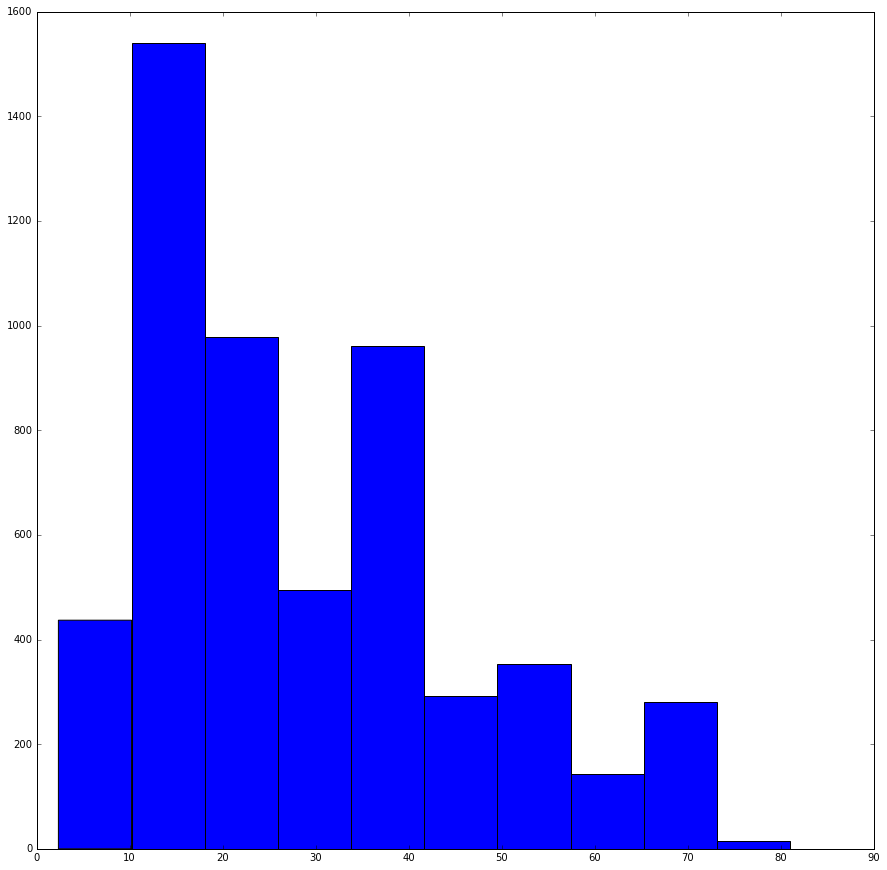

In [103]:
plt.figure(figsize=(15,15));
plt.hist((trips['travel_time']/60))

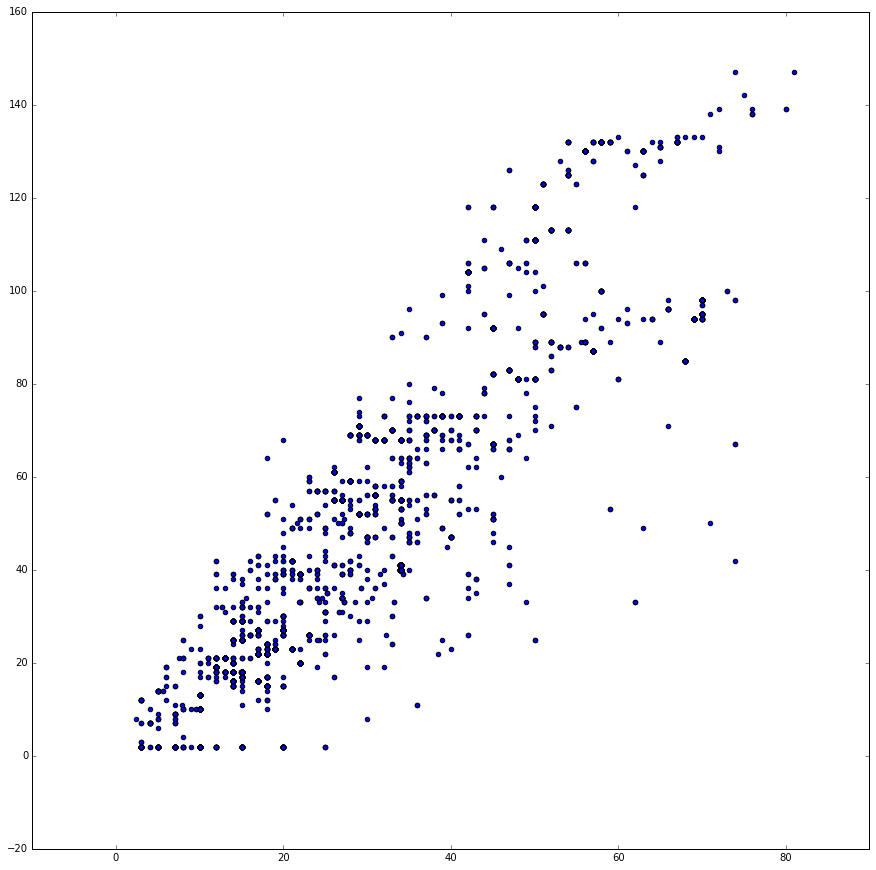

In [104]:
plt.figure(figsize=(15,15));
plt.scatter((trips['travel_time']/60),trips['stop_frequency'])

(array([ 2856.,  1340.,   250.,   111.,   263.,   373.,   171.,   122.,
            7.,     5.]),
 array([  8.21083097e+04,   8.66936455e+06,   1.72566208e+07,
          2.58438770e+07,   3.44311333e+07,   4.30183895e+07,
          5.16056458e+07,   6.01929020e+07,   6.87801582e+07,
          7.73674145e+07,   8.59546707e+07]),
 <a list of 10 Patch objects>)

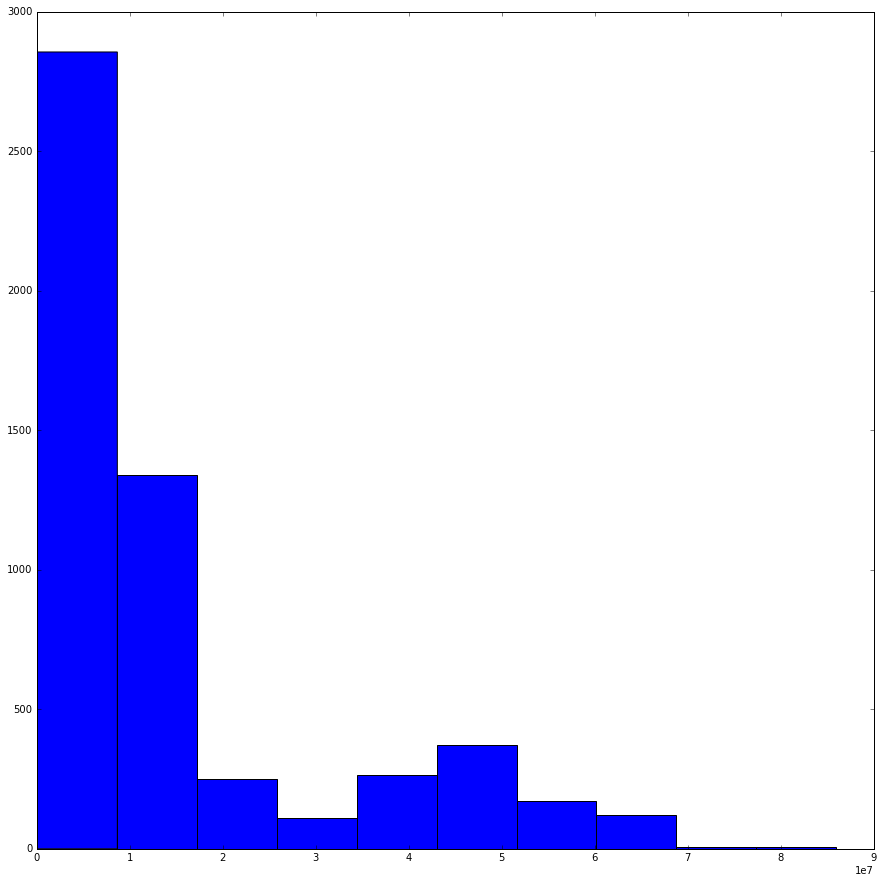

In [142]:
# histogram of travel_distance
plt.figure(figsize=(15,15));
plt.hist((trips['travel_distance']))

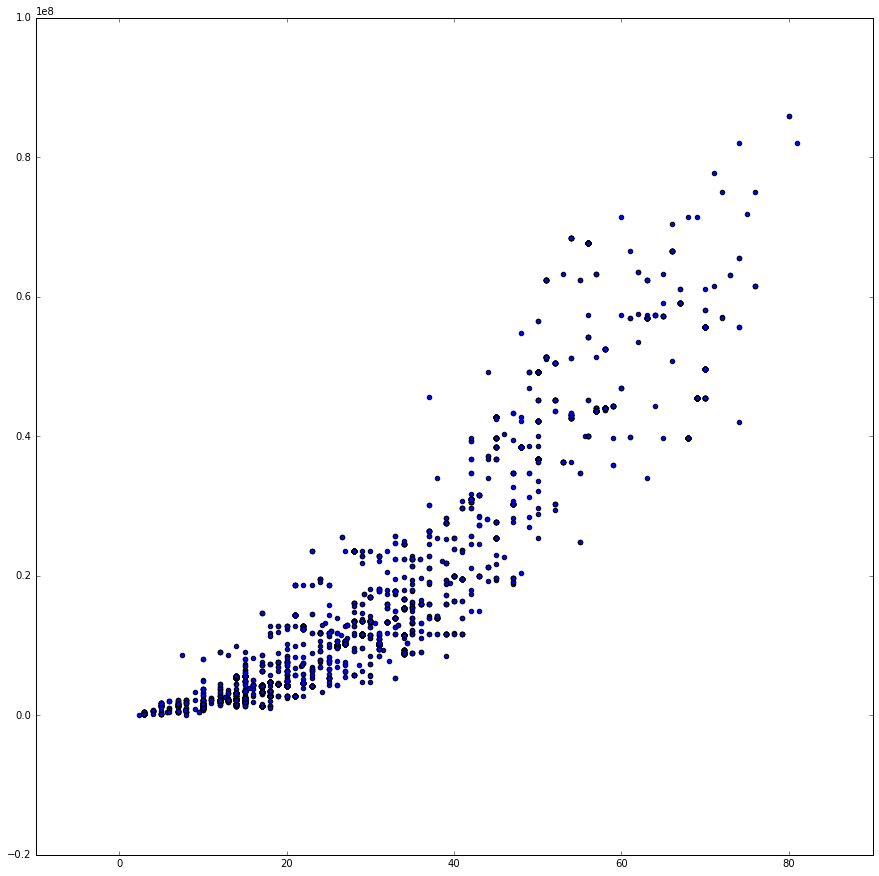

In [113]:
# relation between travel_time and travel_distance
plt.figure(figsize=(15,15));
plt.scatter((trips['travel_time']/60),trips['travel_distance'])

In [83]:
#trips[trips.travel_time<0]
#trips[trips['travel_time']<=0]
stop_times[stop_times['trip_id']=='[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,arrival_time_ms,departure_time_ms
3020,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:55:00,23:55:00,IT:5,0,NaN,0,0,86100.0,86100.0
3021,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:56:24,23:56:24,LGN1ST:3,1,NaN,0,0,86184.0,86184.0
3022,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:56:52,23:56:52,WHT2ND:3,2,NaN,0,0,86212.0,86212.0
3023,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:57:36,23:57:36,WHT4TH:3,3,NaN,0,0,86256.0,86256.0
3024,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:58:24,23:58:24,WHT6TH:3,4,NaN,0,0,86304.0,86304.0
3025,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:58:52,23:58:52,WHTWRT:3,5,NaN,0,0,86332.0,86332.0
3026,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,23:59:48,23:59:48,WRTSPFLD:4,6,NaN,0,0,86388.0,86388.0
3027,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,24:00:36,24:00:36,WRTHLY:4,7,NaN,0,0,36.0,36.0
3028,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,24:02:00,24:02:00,IU:1,8,NaN,0,0,120.0,120.0
3029,[@7.0.41903462@][3][1243545711640]/29__T3_NONUIMF,24:02:40,24:02:40,GRNMAT:3,9,NaN,0,0,160.0,160.0


In [147]:
# get mean time and travel_distance for each route

def meanTimeRoute(col,trips):
#    print(row)
    obs_trip = trips[trips['route_id']==col]
    mean_time = obs_trip.groupby('route_id')['travel_time'].mean()
#    print(mean_time.shape[0])
    if mean_time.shape[0] > 0:
        mean_time = mean_time[0]
    else:
        mean_time = 0
    return mean_time

def meanDistRoute(col,trips):
#    print(row)
    obs_trip = trips[trips['route_id']==col]
    mean_dist = obs_trip.groupby('route_id')['travel_distance'].mean()
    if mean_dist.shape[0] > 0 :
        mean_dist = mean_dist[0]
    else:
        mean_dist = 0
    return mean_dist

def meanStopFreq(col,trips):
    obs_trip = trips[trips['route_id']==col]
    mean_stop = obs_trip.groupby('route_id')['stop_frequency'].mean()
    if mean_stop.shape[0] > 0 :
        mean_stop = mean_stop[0]
    else:
        mean_stop = 0
    return mean_stop    
    
routes['mean_time'] = routes.xroute_id.apply(lambda col: meanTimeRoute(col,trips))
routes['mean_dist'] = routes.xroute_id.apply(lambda col: meanDistRoute(col,trips))
routes['mean_stop'] = routes.xroute_id.apply(lambda col: meanStopFreq(col,trips))

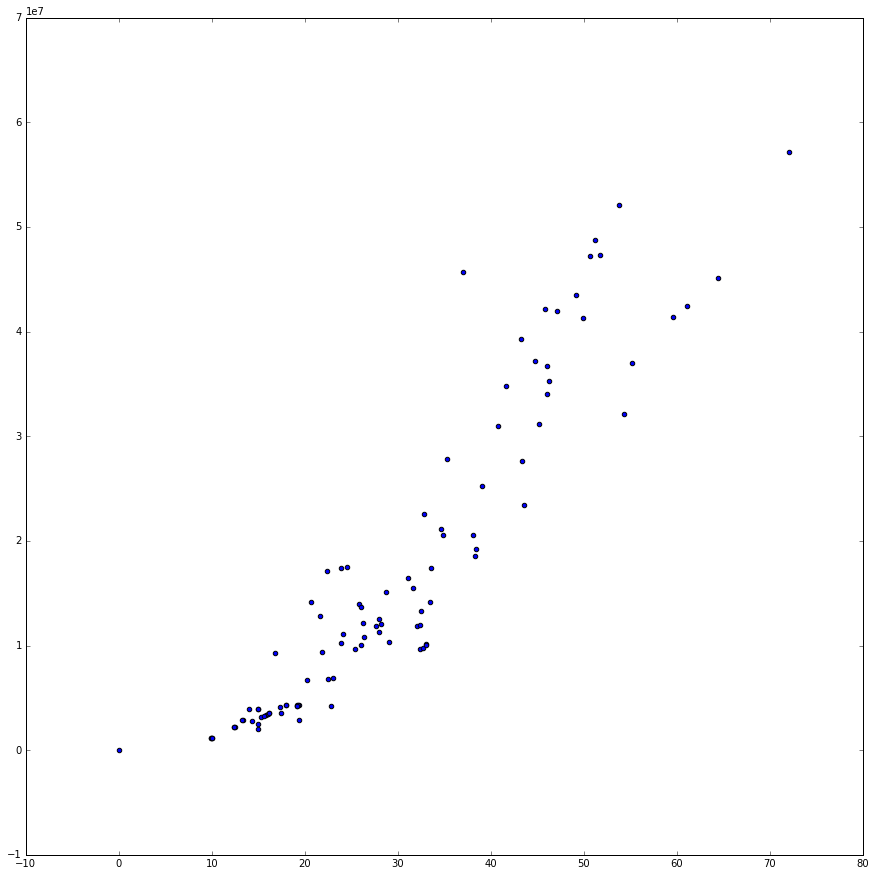

In [144]:
plt.figure(figsize=(15,15));
plt.scatter((routes['mean_time']/60),routes['mean_dist'])

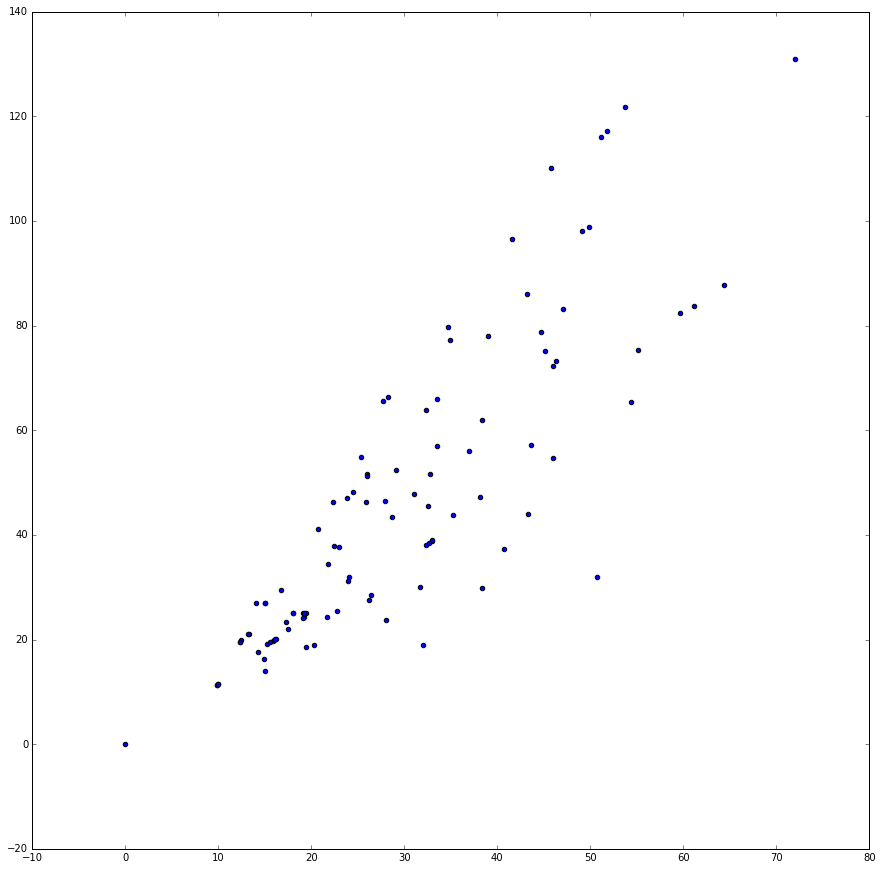

In [148]:
plt.figure(figsize=(15,15));
plt.scatter((routes['mean_time']/60),routes['mean_stop'])